# Callisto Data Quality Analysis for CIFAR-10

### Dependencies
* Python 3
* Pickle
* Matplotlib
* Keras
* Numpy

In [1]:

from keras.datasets import cifar10
import matplotlib.pyplot as plt
import _pickle as pickle
from keras.utils import to_categorical
import numpy as np
import keras



Using TensorFlow backend.


In [2]:
class_names = {
 0: 'airp',
 1: 'autom',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'
}

In [3]:
# Training parameters
num_classes = 10

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


    
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)


### all_train_acts.pickle contains all the activations of the training data. This is necesscary for Callisto to calculate the shannon indices of the image input. Please download the file [here](https://drive.google.com/file/d/1PGVjDtV-vJJHz9QEjkIUpWPMNaTbGQpd/view?usp=sharing) if you download this file independently. The file should be saved in the "saved_pickles". 

### If you have downloaded it as part of the GitHub repo, it should be downloaded automatically

### MD5 Sum = bc8c6bc9a7517d9eb5de342db3e6e7f9

In [4]:
with open('../saved_pickles/all_train_acts.pickle', 'rb') as handle: 
     all_acts = pickle.load(handle)

In [5]:
def shannon(arrs):
    shannons = []
    for arr in arrs:
        sum = 0
        for i in arr:
            sum += (i*np.log(i))
        shannons.append(sum * -1.0)
    return shannons

In [6]:
all_shannons = shannon(all_acts)

In [7]:
low_shannon_false = []
for i in range(len(all_shannons)):
    if all_shannons[i] < 0.01 and np.argmax(all_acts[i]) != np.argmax(y_train[i]) : 
        low_shannon_false.append(i)
        
print("Number of Low Entropy, but false images:", len(low_shannon_false))

Number of Low Entropy, but false images: 84


### L: Label of the image, P: prediction of the model. The number in between is the index of the data point in the MNIST dataset

### Low Entropy (The model is fairly certain of the prediction), but the prediction for these images is incorrect. 

### Intuitively, this may mean that the data may be mislabelled [1]. 

### For CIFAR-10, as seen in the paper results this technique doesn't seem fully successful in indentifying mislabelled inputs. Some prominent examples have been listed below. 

### Prominent image indices = [45936, 48769, 45262, 49151]

#### References
* [1] Jiangwen Sun, Feng-ying Zhao, Chong-Jun Wang, and Shifu Chen. Identifying and correcting mislabeled training instances. *In Future Generation Communication and Networking, FGCN 2007, Ramada Plaza Jeju, Jeju-Island, Korea, December 6-8, 2007, Proceedings, pages 244  250, 2007*. URL: https://doi.org/10.1109/FG 

Low Entropy (The model is fairly certain of the prediction), but false images.


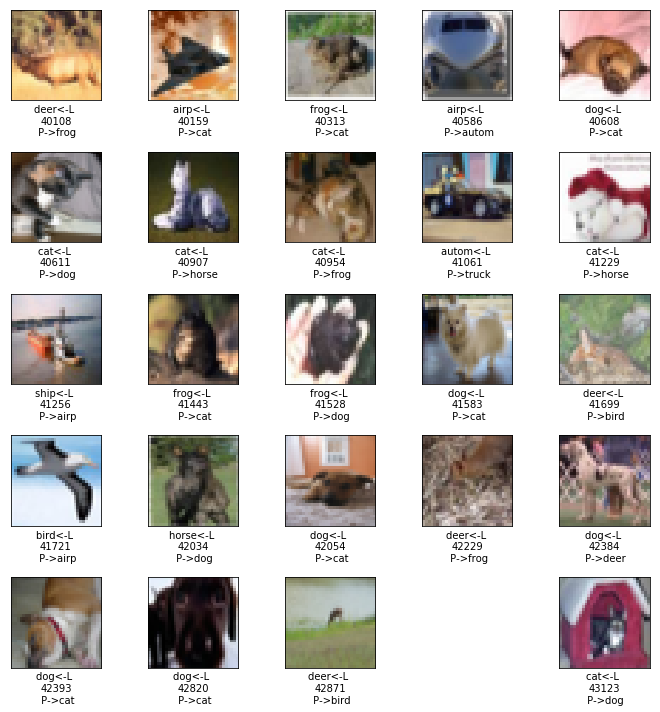

In [8]:
plt.figure(figsize=(10,10))

## Offset by multiples of 25 to see new examples
offset = 0

print("Low Entropy (The model is fairly certain of the prediction), but false images.")
for i in range(min(25, len(low_shannon_false))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[low_shannon_false[i + offset]], cmap=plt.cm.binary)
    plt.xlabel(str(class_names[np.argmax(y_train[low_shannon_false[i + offset]])]) + "<-L \n"  + str(low_shannon_false[i + offset]) +"\n P->" + str(class_names[np.argmax(all_acts[low_shannon_false[i + offset]])]))
    plt.tight_layout()

plt.show()



Prominenet examples


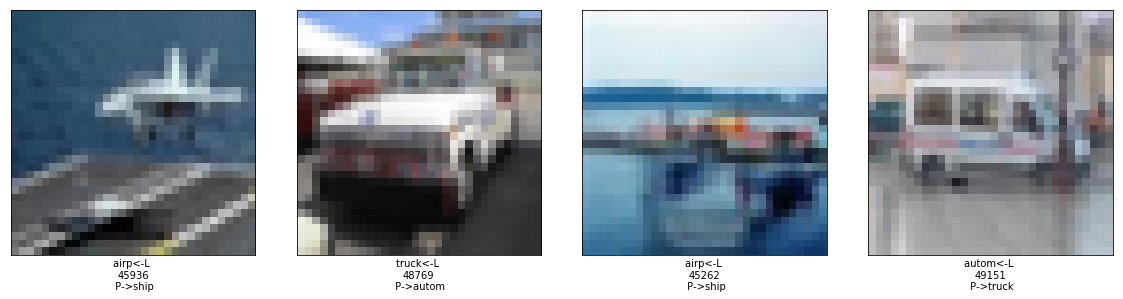

In [9]:
prominent_examples = [45936, 48769, 45262, 49151]

plt.figure(figsize=(20,20))

## Offset by multiples of 25 to see new examples
offset = 0

print("Prominenet examples")
for i in range(min(25, len(prominent_examples))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[prominent_examples[i + offset]], cmap=plt.cm.binary)
    plt.xlabel(str(class_names[np.argmax(y_train[prominent_examples[i + offset]])]) + "<-L \n"  + str(prominent_examples[i + offset]) +"\n P->" + str(class_names[np.argmax(all_acts[prominent_examples[i + offset]])]))
    plt.tight_layout()

plt.show()